In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
estimates = pd.read_csv('./data/result.csv')

In [4]:
estimates.head(1)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>rideId</th>
      <th>eta</th>
      <th>ata</th>
      <th>createdAt</th>
      <th>hongijan</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>6325513</td>
      <td>772</td>
      <td>1021</td>
      <td>2018-11-23 16:56:39</td>
      <td>1054.228023</td>
    </tr>
  </tbody>
</table>
</div>

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


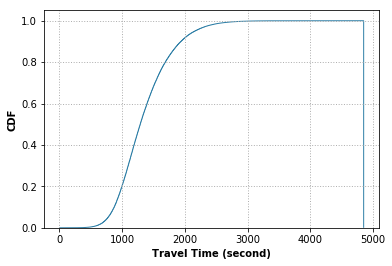

In [87]:
fig = plt.figure()
plt.hist(estimates['eta'], cumulative=True, normed=True, bins=1000, color="#3281a8", histtype='step')
plt.grid(axis='both', linestyle=':', linewidth=1)
plt.xlabel('Travel Time (second)', fontweight='bold')
plt.ylabel('CDF', fontweight='bold')
fig.savefig('plots/cdf.png', dpi=1000)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


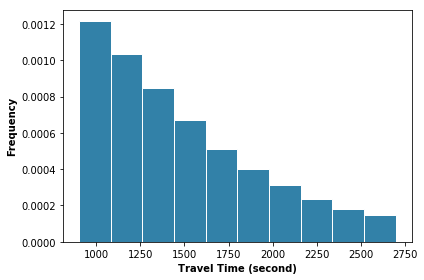

In [88]:
fig = plt.figure()
estimates['ata'].hist(bins=10, normed=True, color="#3281a8", edgecolor='white')
plt.xlabel('Travel Time (second)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.grid(False)
fig.tight_layout()
fig.savefig('plots/hist.png', dpi=1000)

In [23]:
estimates.count()

rideId       141121
eta          141121
ata          141121
createdAt    141121
hongijan     140597
dtype: int64

In [8]:
estimates['day'] = pd.to_datetime(estimates['createdAt']).map(lambda x: x.day)
# estimates['dayofweek'] = pd.to_datetime(estimates['createdAt']).map(lambda x: x.dayofweek)

In [38]:
estimates.groupby('day').count()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>rideId</th>
      <th>eta</th>
      <th>ata</th>
      <th>createdAt</th>
      <th>hongijan</th>
      <th>dayofweek</th>
    </tr>
    <tr>
      <th>day</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>17</th>
      <td>19994</td>
      <td>19994</td>
      <td>19994</td>
      <td>19994</td>
      <td>19931</td>
      <td>19994</td>
    </tr>
    <tr>
      <th>18</th>
      <td>18084</td>
      <td>18084</td>
      <td>18084</td>
      <td>18084</td>
      <td>18020</td>
      <td>18084</td>
    </tr>
    <tr>
      <th>19</th>
      <td>20402</td>
      <td>20402</td>
      <td>20402</td>
      <td>20402</td>
      <td>20337</td>
      <td>20402</td>
    </tr>
    <tr>
      <th>20</th>
      <td>21136</td>
      <td>21136</td>
      <td>21136</td>
      <td>21136</td>
      <td>21065</td>
      <td>21136</td>
    </tr>
    <tr>
      <th>21</th>
      <td>25747</td>
      <td>25747</td>
      <td>25747</td>
      <td>25747</td>
      <td>25678</td>
      <td>25747</td>
    </tr>
    <tr>
      <th>22</th>
      <td>23452</td>
      <td>23452</td>
      <td>23452</td>
      <td>23452</td>
      <td>23350</td>
      <td>23452</td>
    </tr>
    <tr>
      <th>23</th>
      <td>12306</td>
      <td>12306</td>
      <td>12306</td>
      <td>12306</td>
      <td>12216</td>
      <td>12306</td>
    </tr>
  </tbody>
</table>
</div>

In [39]:
estimates.groupby('day').count().mean()

rideId       20160.142857
eta          20160.142857
ata          20160.142857
createdAt    20160.142857
hongijan     20085.285714
dayofweek    20160.142857
dtype: float64

In [41]:
estimates.drop('rideId',axis=1).sum()

eta                                                  191699383
ata                                                  208154602
createdAt    2018-11-23 16:56:392018-11-23 09:56:292018-11-...
hongijan                                           2.20053e+08
day                                                    2815437
dayofweek                                               400684
dtype: object

In [43]:
estimates.drop('rideId',axis=1).groupby('day').sum() / 3600

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>eta</th>
      <th>ata</th>
      <th>hongijan</th>
      <th>dayofweek</th>
    </tr>
    <tr>
      <th>day</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>17</th>
      <td>7488.174167</td>
      <td>8136.793333</td>
      <td>8471.277877</td>
      <td>27.769444</td>
    </tr>
    <tr>
      <th>18</th>
      <td>6828.092778</td>
      <td>7395.393056</td>
      <td>8117.808373</td>
      <td>30.140000</td>
    </tr>
    <tr>
      <th>19</th>
      <td>7743.906111</td>
      <td>8409.044722</td>
      <td>9235.959333</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>20</th>
      <td>8005.705556</td>
      <td>8657.553056</td>
      <td>9447.712747</td>
      <td>5.871111</td>
    </tr>
    <tr>
      <th>21</th>
      <td>9690.919722</td>
      <td>10693.547222</td>
      <td>11120.268688</td>
      <td>14.303889</td>
    </tr>
    <tr>
      <th>22</th>
      <td>8777.560278</td>
      <td>9645.116389</td>
      <td>9990.301532</td>
      <td>19.543333</td>
    </tr>
    <tr>
      <th>23</th>
      <td>4715.470000</td>
      <td>4883.275000</td>
      <td>4742.461405</td>
      <td>13.673333</td>
    </tr>
  </tbody>
</table>
</div>

In [45]:
estimates.drop('rideId',axis=1).groupby('day').sum().mean() / 3600

eta          7607.118373
ata          8260.103254
hongijan     8732.255708
dayofweek      15.900159
dtype: float64